# Using Groupby in Pandas

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline

### The titanic dataset 

We will look at our old friends in the Titanic dataset to deal with imputing the missing values in `age`.

In [2]:
sns.get_dataset_names()

/usr/lib/python3.5/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 184 of the file /usr/lib/python3.5/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'exercise',
 'flights',
 'gammas',
 'iris',
 'planets',
 'tips',
 'titanic']

In [3]:
titanic = sns.load_dataset('titanic')

### A solution

I will show you how to fill in missing values in age with a grouped mean

Once we have seen how it's done and the result, we will examine the groupby in more detail

In [4]:
# the mean age of passengers on the Titanic - we could fill all the missing ages with this value
titanic['age'].mean()

29.69911764705882

### Individual means for groups

Maybe a better solution would be to calculate a mean for males and females of each of the three classes and fill missing values from the same group with that value

### GroupBy

In [5]:
sex_class = titanic.groupby(['sex','class'])['age']

The groupby has created a series with a hierachical index. We can then apply methods to the individual groups

In [6]:
sex_class.mean()

sex     class 
female  First     34.611765
        Second    28.722973
        Third     21.750000
male    First     41.281386
        Second    30.740707
        Third     26.507589
Name: age, dtype: float64

In [7]:
# A pretty table to put in a report....
pd.DataFrame(sex_class.mean())

age
sex    class            
female First   34.611765
       Second  28.722973
       Third   21.750000
male   First   41.281386
       Second  30.740707
       Third   26.507589

### Apply `.fillna()` to each group with the mean of that group

In [8]:
# Take the tuple key for each grouping 
for (k,v) in sex_class.groups:
    
    # create a list with the missing values filled with the mean for that group
    filled = sex_class.get_group((k,v)).fillna(pd.np.round(sex_class.get_group((k,v)).mean()))
    
    # the first time through the loop create a new column 'age_imputed', insert values in it each successive time
    titanic.loc[(titanic['sex'] == k)&(titanic['class'] == v),'age_imputed'] = filled

### Question

Why didn't we overwrite the 'age_imputed' column each time through the loop?

### We have filled the missing values in our new column

Where there was a missing value in `age`, we have the appropriate mean value in `age_imputed`

In [9]:
# four columns with rows where 'age' is missing
titanic[['age','age_imputed','sex','class']][titanic['age'].isnull()].head()

,age,age_imputed,sex,class
5,NaN,27.0,male,Third
17,NaN,31.0,male,Second
19,NaN,22.0,female,Third
26,NaN,27.0,male,Third
28,NaN,22.0,female,Third


### How does this work?

Let's go through the process and examine each step more closely

In [10]:
# apply two methods to each group
mean_age = titanic.groupby(['sex','class'])['age'].apply(pd.np.mean).apply(pd.np.round)

# We have created a MultiIndex
print(mean_age.index)
mean_age

MultiIndex(levels=[['female', 'male'], ['First', 'Second', 'Third']],
           labels=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]],
           names=['sex', 'class'])


sex     class 
female  First     35.0
        Second    29.0
        Third     22.0
male    First     41.0
        Second    31.0
        Third     27.0
Name: age, dtype: float64

### Is rounding the age a good idea?

### Why is this useful

We have seen that a closer approximation of the true age of passengers can be derived from information like their salutation.

This is a more general approach that relies on the sex and class of the passenger, which you can see shows a trend of First class being older than Second and Third class having the youngest mean age. This mean age of each class is also different for males and females.

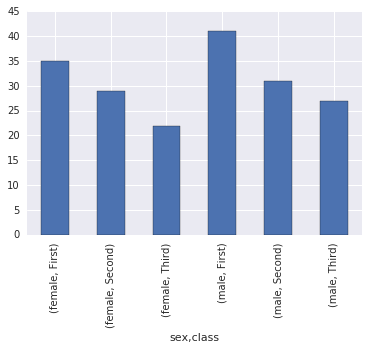

In [11]:
mean_age.plot(kind='bar')

# The grouped Structure

### Tuples as keys

The group `age_fill` is a dictionary-like structure with the keys being tuples.

In [12]:
type(mean_age)

pandas.core.series.Series

In [13]:
type(sex_class)

pandas.core.groupby.SeriesGroupBy

In [14]:
print(mean_age.keys())

MultiIndex(levels=[['female', 'male'], ['First', 'Second', 'Third']],
           labels=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]],
           names=['sex', 'class'])


In [15]:
print(sex_class.groups.keys())

dict_keys([('male', 'First'), ('female', 'First'), ('female', 'Third'), ('male', 'Second'), ('male', 'Third'), ('female', 'Second')])


In [16]:
mean_age[('male', 'Second')]

31.0

In [17]:
sex_class.get_group(('male', 'Second'))

17       NaN
20     35.00
21     34.00
33     66.00
70     32.00
72     21.00
78      0.83
99     34.00
117    29.00
120    21.00
122    32.50
134    25.00
135    23.00
144    18.00
145    19.00
148    36.50
149    42.00
150    51.00
178    30.00
181      NaN
183     1.00
191    19.00
193     3.00
213    30.00
217    42.00
219    30.00
221    27.00
226    19.00
228    18.00
232    59.00
       ...  
672    70.00
673    31.00
674      NaN
684    60.00
685    25.00
695    52.00
705    39.00
714    52.00
722    34.00
723    50.00
728    25.00
732      NaN
733    23.00
734    23.00
755     0.67
757    18.00
791    16.00
795    39.00
800    34.00
808    39.00
812    35.00
817    31.00
827     1.00
831     0.83
841    16.00
848    28.00
861    21.00
864    24.00
883    28.00
886    27.00
Name: age, dtype: float64

In [18]:
mean_age[('female', 'Second')]

29.0

In [19]:
for (k,v) in sex_class.groups:
    print(k,v)

male First
female First
female Third
male Second
male Third
female Second


In [20]:
for (k,v) in sex_class.groups:
    
    # create a list with the missing values filled with the mean for that group
    print(k,v)
    print(sex_class.get_group((k,v)))


male First
6      54.0
23     28.0
27     19.0
30     40.0
34     28.0
35     42.0
54     65.0
55      NaN
62     45.0
64      NaN
83     28.0
92     46.0
96     71.0
97     23.0
102    21.0
110    47.0
118    24.0
124    54.0
137    37.0
139    24.0
155    51.0
168     NaN
170    61.0
174    56.0
185     NaN
187    45.0
209    40.0
224    38.0
245    44.0
248    37.0
       ... 
662    47.0
671    31.0
679    36.0
681    27.0
690    31.0
694    60.0
698    49.0
701    35.0
707    42.0
711     NaN
712    48.0
724    27.0
737    35.0
740     NaN
741    36.0
745    70.0
748    19.0
766     NaN
782    29.0
789    46.0
793     NaN
802    11.0
806    39.0
815     NaN
822    38.0
839     NaN
857    51.0
867    31.0
872    33.0
889    26.0
Name: age, dtype: float64
female First
1      38.0
3      35.0
11     58.0
31      NaN
52     49.0
61     38.0
88     23.0
136    19.0
151    22.0
166     NaN
177    50.0
194    44.0
195    58.0
215    31.0
218    32.0
230    35.0
256     NaN
257    30.0
25

### Use `.fillna()` to replace a NaN with `..something..`

In [21]:
for (k,v) in sex_class.groups:
    print(sex_class.get_group((k,v)).fillna('this was missing'))

6                    54
23                   28
27                   19
30                   40
34                   28
35                   42
54                   65
55     this was missing
62                   45
64     this was missing
83                   28
92                   46
96                   71
97                   23
102                  21
110                  47
118                  24
124                  54
137                  37
139                  24
155                  51
168    this was missing
170                  61
174                  56
185    this was missing
187                  45
209                  40
224                  38
245                  44
248                  37
             ...       
662                  47
671                  31
679                  36
681                  27
690                  31
694                  60
698                  49
701                  35
707                  42
711    this was missing
712             

### This is how to calculate the mean for each of the groups

In [22]:
for (k,v) in sex_class.groups:
    # This is what we will put inside the call to .fillna()
    print(pd.np.round(sex_class.get_group((k,v)).mean()))

41.0
35.0
22.0
31.0
27.0
29.0


### Select a subset of the titanic dataset that matches our groups

In [23]:
for (k,v) in sex_class.groups:
    print(titanic.loc[(titanic['sex'] == k)&(titanic['class'] == v)])

     survived  pclass   sex   age  sibsp  parch      fare embarked  class  \
6           0       1  male  54.0      0      0   51.8625        S  First   
23          1       1  male  28.0      0      0   35.5000        S  First   
27          0       1  male  19.0      3      2  263.0000        S  First   
30          0       1  male  40.0      0      0   27.7208        C  First   
34          0       1  male  28.0      1      0   82.1708        C  First   
35          0       1  male  42.0      1      0   52.0000        S  First   
54          0       1  male  65.0      0      1   61.9792        C  First   
55          1       1  male   NaN      0      0   35.5000        S  First   
62          0       1  male  45.0      1      0   83.4750        S  First   
64          0       1  male   NaN      0      0   27.7208        C  First   
83          0       1  male  28.0      0      0   47.1000        S  First   
92          0       1  male  46.0      1      0   61.1750        S  First   

### And finally fill in 'age_imputed' group by group with our filled ages series

In [24]:
for (k,v) in sex_class.groups:
    # create a list with the missing values filled with the mean for that group
    filled = sex_class.get_group((k,v)).fillna(pd.np.round(sex_class.get_group((k,v)).mean()))
    
    # show data type, size and group
    print(type(filled), len(filled), k,v)
    
    # the first time through the loop create a new column 'age_imputed', insert values in it each successive time
    titanic.loc[(titanic['sex'] == k)&(titanic['class'] == v),'age_imputed'] = filled

<class 'pandas.core.series.Series'> 122 male First
<class 'pandas.core.series.Series'> 94 female First
<class 'pandas.core.series.Series'> 144 female Third
<class 'pandas.core.series.Series'> 108 male Second
<class 'pandas.core.series.Series'> 347 male Third
<class 'pandas.core.series.Series'> 76 female Second
